# 1. Import and config

In [1]:
from pynq_dpu import DpuOverlay
overlay = DpuOverlay("dpu.bit")
# overlay.load_model("dpu_testModel_0.elf")

In [2]:
from dnndk import n2cube
import numpy as np
from numpy import float32
import os
import cv2
import matplotlib.pyplot as plt
import time
import DpuCar
from DpuCar import CommonFunction
import shutil

In [3]:
KERNEL_CONV="dpuCarModel_0"
# KERNEL_CONV="miniResNet"

# 训练用的图像尺寸
img_size_net = 32
# 训练的batch大小
batch_size = 32
wordlist = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42']

sorts_pathes = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42']
run_path = './'

# 存放转换后的tf数据集的路径
dataset_tf_path_train = run_path + 'datasetTfTrain.tfrecords'
dataset_tf_path_test = run_path + 'datasetTfTest.tfrecords'
CONV_INPUT_NODE = "x_input_Conv2D"
CONV_OUTPUT_NODE = "y_out_MatMul"

# 2. Loading the dataset

In [4]:
sorts_list =['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42']

img_size_net = 32
CONV_INPUT = "conv2d_input"
calib_batch_size = 30

def load_valid_data(data_path):
    label_cnt = 0
    test_images = []
    test_lables = []
    for sort_path in sorts_list:    
        flower_list = os.listdir(data_path + sort_path)
        for img_name in flower_list:
            img_path = data_path + sort_path + "/" + img_name
            img = cv2.imread(img_path)  
            #img=img[..., None]
            img_scale = cv2.resize(img,(img_size_net, img_size_net), interpolation = cv2.INTER_CUBIC)
            if not img is None:
                test_images.append(img_scale / 255.)
                test_lables.append(label_cnt)
        label_cnt += 1
    #test_images=np.array(test_images)
    #test_images=test_images[..., None]           
    return test_images, test_lables

dataset_valid_path = './dataset_valid/'
(validSet_images, validSet_lables) = load_valid_data(dataset_valid_path)

validSet_images = np.array(validSet_images)

print(validSet_images.shape)
validSet_lables = np.array(validSet_lables)

def calib_input(iter):
    images = []
    for index in range(0, calib_batch_size):
        images.append(validSet_images[index])

    return {"Placeholder":validSet_images}



(2000, 32, 32, 3)


# 3. DPU experiment

## 3.1 Load kernel to DPU

In [5]:
n2cube.dpuOpen()
kernel = n2cube.dpuLoadKernel(KERNEL_CONV)
DPU_TASK = n2cube.dpuCreateTask(kernel, mode=2)
# car1 = DpuCar.DpuCar(DPU_TASK, dpu_input_node=, dpu_output_node=， dpu_img_size=)
car1 = DpuCar.DpuCar(DPU_TASK)

160.0 120.0
30.0


## 3.2 Test experiment with valid_dataset

[[[ 0.09019608  0.09019608  0.09019608]
  [ 0.0745098   0.0745098   0.0745098 ]
  [ 0.05490196  0.05490196  0.05490196]
  ..., 
  [ 1.          1.          1.        ]
  [ 0.80392157  0.80392157  0.80392157]
  [ 0.64313725  0.64313725  0.64313725]]

 [[ 0.0627451   0.0627451   0.0627451 ]
  [ 0.03921569  0.03921569  0.03921569]
  [ 0.01960784  0.01960784  0.01960784]
  ..., 
  [ 0.98823529  0.98823529  0.98823529]
  [ 0.77254902  0.77254902  0.77254902]
  [ 0.58823529  0.58823529  0.58823529]]

 [[ 0.04313725  0.04313725  0.04313725]
  [ 0.01176471  0.01176471  0.01176471]
  [ 0.          0.          0.        ]
  ..., 
  [ 0.88235294  0.88235294  0.88235294]
  [ 0.78431373  0.78431373  0.78431373]
  [ 0.64313725  0.64313725  0.64313725]]

 ..., 
 [[ 0.32156863  0.32156863  0.32156863]
  [ 0.46666667  0.46666667  0.46666667]
  [ 0.36470588  0.36470588  0.36470588]
  ..., 
  [ 0.15294118  0.15294118  0.15294118]
  [ 0.13333333  0.13333333  0.13333333]
  [ 0.09803922  0.09803922  0.09803

0
[[[ 0.7372549   0.7372549   0.7372549 ]
  [ 0.38431373  0.38431373  0.38431373]
  [ 0.43529412  0.43529412  0.43529412]
  ..., 
  [ 0.01568627  0.01568627  0.01568627]
  [ 0.03921569  0.03921569  0.03921569]
  [ 0.          0.          0.        ]]

 [[ 0.63529412  0.63529412  0.63529412]
  [ 0.41568627  0.41568627  0.41568627]
  [ 0.39215686  0.39215686  0.39215686]
  ..., 
  [ 0.0627451   0.0627451   0.0627451 ]
  [ 0.          0.          0.        ]
  [ 0.04313725  0.04313725  0.04313725]]

 [[ 0.90588235  0.90588235  0.90588235]
  [ 0.90196078  0.90196078  0.90196078]
  [ 0.43921569  0.43921569  0.43921569]
  ..., 
  [ 0.05490196  0.05490196  0.05490196]
  [ 0.0627451   0.0627451   0.0627451 ]
  [ 0.05490196  0.05490196  0.05490196]]

 ..., 
 [[ 0.52941176  0.52941176  0.52941176]
  [ 0.56078431  0.56078431  0.56078431]
  [ 0.55686275  0.55686275  0.55686275]
  ..., 
  [ 0.14901961  0.14901961  0.14901961]
  [ 0.09411765  0.09411765  0.09411765]
  [ 0.3254902   0.3254902   0.325

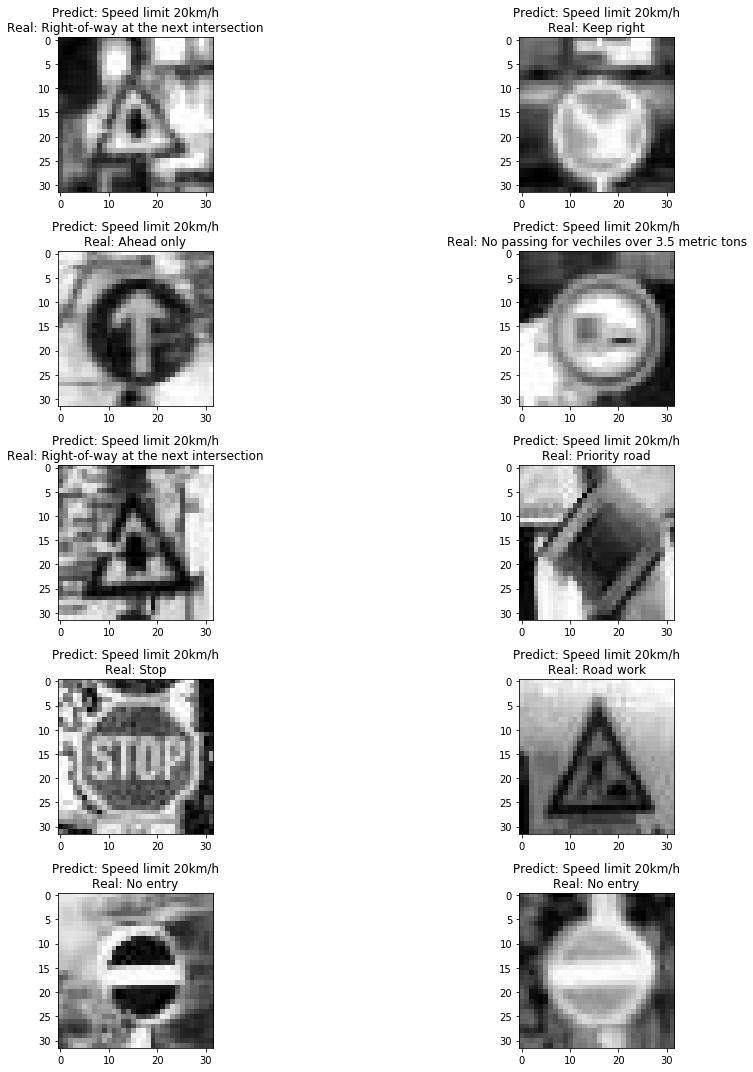

In [6]:
wordlist[0]="Speed limit 20km/h"
wordlist[1]="Speed limit 30km/h"
wordlist[2]="Speed limit 50km/h"
wordlist[3]="Speed limit 60km/h"
wordlist[4]="Speed limit 70km/h"
wordlist[5]="Speed limit 80km"
wordlist[6]="Speed limit 90km"
wordlist[7]="Speed limit 100km"
wordlist[8]="Speed limit 120km"
wordlist[9]="No passing"
wordlist[10]="No passing for vechiles over 3.5 metric tons"
wordlist[11]="Right-of-way at the next intersection"
wordlist[12]="Priority road"
wordlist[13]="Yield"
wordlist[14]="Stop"
wordlist[15]="No vechiles"
wordlist[16]="Vechiles over 3.5 metric tons prohibited"
wordlist[17]="No entry"
wordlist[18]="General caution"
wordlist[19]="Dangerous curve to the left"
wordlist[20]="Dangerous curve to the right"
wordlist[21]="Double curve"
wordlist[22]="Bumpy road"
wordlist[23]="Slippery road"
wordlist[24]="Road narrows on the right"
wordlist[25]="Road work"
wordlist[26]="Traffic signals"
wordlist[27]="Pedestrians"
wordlist[28]="Children crossing"
wordlist[29]="Bicycles crossing"
wordlist[30]="Beware of ice/snow"
wordlist[31]="Wild animals crossing"
wordlist[32]="End of all speed and passing limits"
wordlist[33]="Turn right ahead"
wordlist[34]="Turn left ahead"
wordlist[35]="Ahead only"
wordlist[36]="Go straight or right"
wordlist[37]="Go straight or left"
wordlist[38]="Keep right"
wordlist[39]="Keep left"
wordlist[40]="Roundabout mandatory"
wordlist[41]="End of no passing"
wordlist[42]="End of no passing by vechiles over 3.5 metric tons"

fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range(2):
        l = np.random.randint(0, len(validSet_lables)-1)
        img1_scale = validSet_images[l]
        print(img1_scale)
        pdt = car1.dpuPredictSoftmax(img1_scale)
        print(pdt)
        img1_scale = np.array(img1_scale, dtype='float32')
        ax[i, j].imshow(cv2.cvtColor(img1_scale, cv2.COLOR_BGR2RGB))
        title = "Predict: " + wordlist[pdt] + "\n" + "Real: " + wordlist[validSet_lables[l]]
        ax[i, j].set_title(title)
plt.tight_layout()

# 3.3 Test experiment with USB camera

Please connect the USB camera to the Ultra 96 first.

In [8]:
for i in range(300):
    # clear the output
    CommonFunction.clear_output()
    # read image from camera
    imgMat = car1.get_image()
    # this image is used for display
    imgShow = cv2.resize(imgMat, (320,240))
    # this image is used for DPU input
    tempImg = cv2.resize(imgMat, (32,32))
    pdt = car1.dpuPredictSoftmax(tempImg)
    font=cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(imgShow,wordlist[pdt],(10,50), font, 1,(255,0,0),2)
    # show result
#     print(wordlist[pdt])
    CommonFunction.show_img_jupyter(imgShow)
    time.sleep(0.1)

Please connect the camera!


IndexError: tuple index out of range